In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [80]:
retail = pd.read_csv("/Users/nlili/Downloads/data-2.csv", encoding="ISO-8859-1", header = 0)

In [81]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [82]:
## Shape of the dataset

retail.shape

(541909, 8)

In [83]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data Cleaning


In [84]:
# calculating the missing value % in the DF

df_null = round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [85]:
## dropping rows having missing values
retail = retail.dropna()
retail.shape

(406829, 8)

In [86]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [88]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [89]:
# new attribute monetory

retail['Amount'] = retail['Quantity']*retail['UnitPrice']

In [90]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [91]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
print(rfm_m.head())

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64


In [92]:
# Inspect the result before resetting the index
print(rfm_m.head())

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64


In [93]:
# Reset index after the groupby operation
rfm_m = rfm_m.reset_index()

In [94]:
# Display the first few rows of the final DataFrame
print(rfm_m.head())

   CustomerID   Amount
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40


# New Attribute frequency

In [182]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
print(rfm_f.head())

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64


In [183]:
# Reset index after the groupby operation
rfm_f = rfm_f.reset_index()

In [184]:
print(rfm_f.head())

   CustomerID  InvoiceNo
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17


In [185]:
rfm = pd.merge(rfm_f,rfm_m, on = 'CustomerID',how= 'inner') 

In [186]:
# Rename the columns in rfm DataFrame
rfm.columns = ['CustomerID', 'Frequency', 'TotalAmount']

# Check the result
print(rfm.head())


   CustomerID  Frequency  TotalAmount
0     12346.0          2         0.00
1     12347.0        182      4310.00
2     12348.0         31      1797.24
3     12349.0         73      1757.55
4     12350.0         17       334.40


In [187]:
## New attribute Recency
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%m/%d/%Y %H:%M')

# compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [188]:
## compute the difeerence between the max date and the invoice date
retail['Recency']= max_date-retail['InvoiceDate']

In [189]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00


In [190]:
## compute the recency
rfm_p = retail.groupby('CustomerID')['Recency'].min()
rfm_p = rfm_p.reset_index()
print(rfm_p.head())


   CustomerID           Recency
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00


In [191]:
## extract the number of days only
rfm_p['Recency'] = rfm_p['Recency'].dt.days


In [192]:
rfm_p.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [193]:
rfm

,CustomerID,Frequency,TotalAmount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


In [194]:
# Merge the two dataframes and add suffixes to differentiate the columns
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')



In [195]:
rfm.head()

,CustomerID,Frequency,TotalAmount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [196]:
## Outlier analysis of Amount, Frequency and Recency

attributes = ['Frequency', 'TotalAmount','Recency']

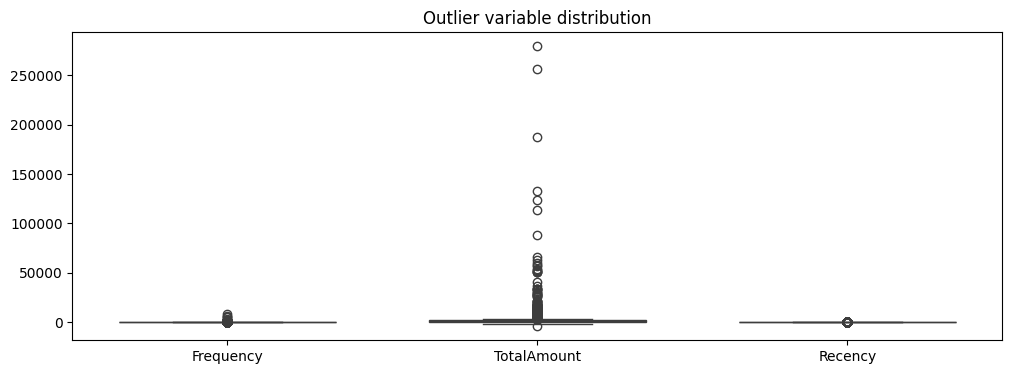

In [199]:
plt.figure(figsize=(12, 4))
# Create the boxplot
sns.boxplot(data=rfm[attributes], orient="v", whis=1.5, saturation=1, width=0.7)

plt.title("Outlier variable distribution")
 # Show the plot
plt.show()         
          

In [202]:
## removing the outlier for Total AMount

Q1 = rfm.TotalAmount.quantile(0.05)
Q3 = rfm.TotalAmount.quantile(0.95)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [209]:
# Filter the data to remove outliers
rfm = rfm[(rfm.TotalAmount >= lower_bound) & (rfm.TotalAmount <= upper_bound)]


In [210]:
## removing the outlier for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the data to remove outliers
rfm = rfm[(rfm.Frequency >= lower_bound) & (rfm.Frequency <= upper_bound)]

In [211]:
## removing the outlier for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the data to remove outliers
rfm = rfm[(rfm.Recency >= lower_bound) & (rfm.Recency <= upper_bound)]

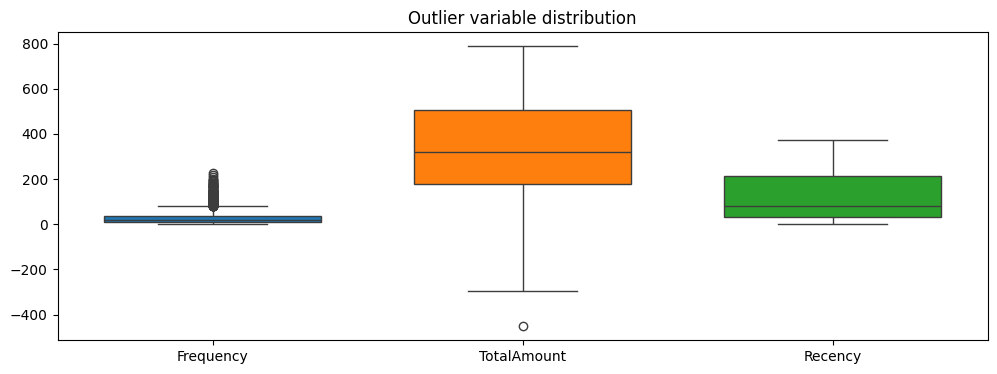

In [212]:
plt.figure(figsize=(12, 4))
# Create the boxplot
sns.boxplot(data=rfm[attributes], orient="v", whis=1.5, saturation=1, width=0.7)

plt.title("Outlier variable distribution")
 # Show the plot
plt.show()         
          

In [218]:
## Scaling the feautres

rfm_df =  rfm[['Frequency', 'TotalAmount','Recency']]

#Instantiate
scaler = StandardScaler()

# Fit and transform the scaler to the selected features
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Check the scaled data
rfm_df_scaled.shape

(2454, 3)

In [220]:
# Convert the scaled numpy array back into a DataFrame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['Frequency', 'TotalAmount', 'Recency'])

# Check the shape of the scaled data
print(rfm_df_scaled.shape)

(2454, 3)


In [221]:
print(rfm_df_scaled.head)

<bound method NDFrame.head of       Frequency  TotalAmount   Recency
0     -0.914264    -1.693297  1.793377
1     -0.429663    -0.075352  1.649021
2     -0.849650    -1.262683  0.692662
3     -0.558890     0.529442  0.782885
4     -0.655810    -0.774494  1.441509
...         ...          ...       ...
2449  -0.688117    -1.220928 -0.624587
2450  -0.688117    -0.851907 -0.480231
2451  -0.655810    -0.819490  1.360309
2452  -0.752730    -1.302261  0.485150
2453  -0.558890    -0.838844 -1.075700

[2454 rows x 3 columns]>


In [222]:
## Model building- Kmeans with some arbitory

# Step 1: Initialize KMeans with arbitrary number of clusters
kmeans = KMeans(n_clusters=4, max_iter =50)  # Let's say we choose 3 clusters
kmeans.fit(rfm_df_scaled)




KMeans(max_iter=50, n_clusters=4)

In [223]:
set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

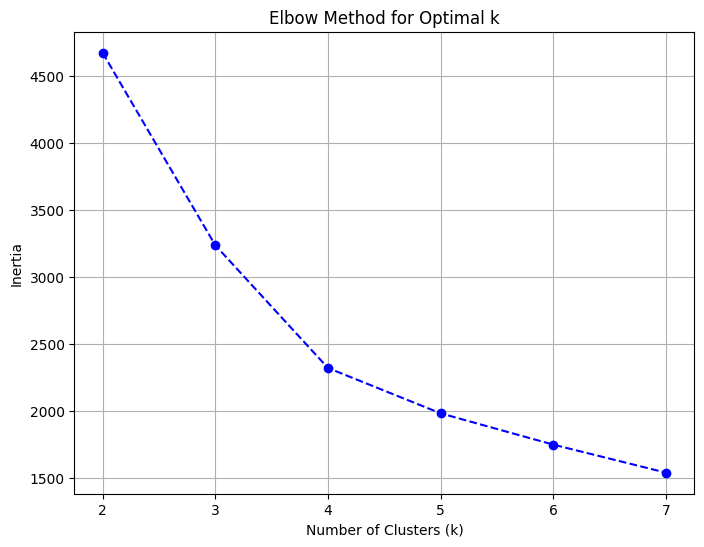

In [226]:
ssd = []

# Try different values of k (2 to 7)
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)  # Append the inertia (sum of squared distances)
    
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), ssd, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 8))  # Corrected the range of x-ticks to match the loop
plt.grid(True)
plt.show()



In [227]:
 # Step 1: Initialize KMeans with arbitrary number of clusters
kmeans = KMeans(n_clusters=3, max_iter =300)  ## Let's say we choose 3 clusters
kmeans.fit(rfm_df_scaled)


KMeans(n_clusters=3)

In [228]:
set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2)}

In [234]:
import pickle


# Define the filename for the pickle file
filename = 'kmeans_model.pkl'

# Open the file in write-binary mode and save the KMeans model into it
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)


In [235]:
print(kmeans.labels_)

[2 2 2 ... 2 2 0]


In [236]:
## assign the label

rfm['cluster id'] = kmeans.predict(rfm_df_scaled)

In [237]:
rfm.head()

,CustomerID,Frequency,TotalAmount,Recency,cluster id
0,12346.0,2,0.0,325,2
4,12350.0,17,334.4,309,2
6,12353.0,4,89.0,203,2
8,12355.0,13,459.4,213,2
14,12361.0,10,189.9,286,2


/var/folders/0v/tzb6k7wd7x5bwyzqrcw753m40000gn/T/ipykernel_2821/2567488952.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='cluster id', y='TotalAmount', data=rfm, palette="Set2")


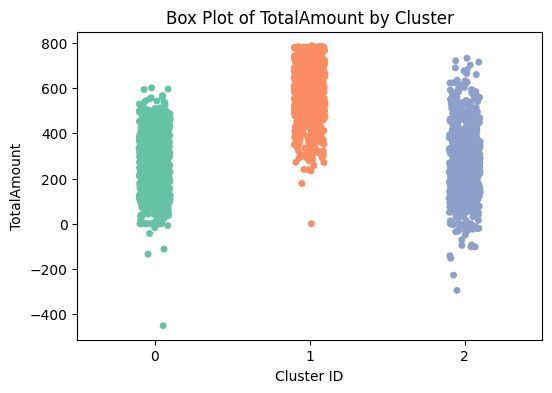

In [248]:
## Box plot to visualize cluster - Total Amount
# Create a box plot to visualize the distribution of 'TotalAmount' by 'cluster id'
plt.figure(figsize=(6, 4))
sns.stripplot(x='cluster id', y='TotalAmount', data=rfm, palette="Set2")

# Add title and labels
plt.title('Box Plot of TotalAmount by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('TotalAmount')

# Display the plot
plt.show()

/var/folders/0v/tzb6k7wd7x5bwyzqrcw753m40000gn/T/ipykernel_2821/3446694545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='cluster id', y='Frequency', data=rfm, palette="Set2")


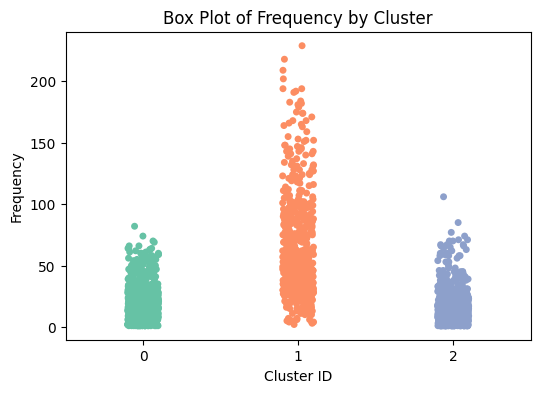

In [247]:
## Box plot to visualize cluster - Frequency
# Create a box plot to visualize the distribution of 'TotalAmount' by 'cluster id'
plt.figure(figsize=(6, 4))
sns.stripplot(x='cluster id', y='Frequency', data=rfm, palette="Set2")

# Add title and labels
plt.title('Box Plot of Frequency by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')

# Display the plot
plt.show()

/var/folders/0v/tzb6k7wd7x5bwyzqrcw753m40000gn/T/ipykernel_2821/901259808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='cluster id', y='Recency', data=rfm, palette="Set2")


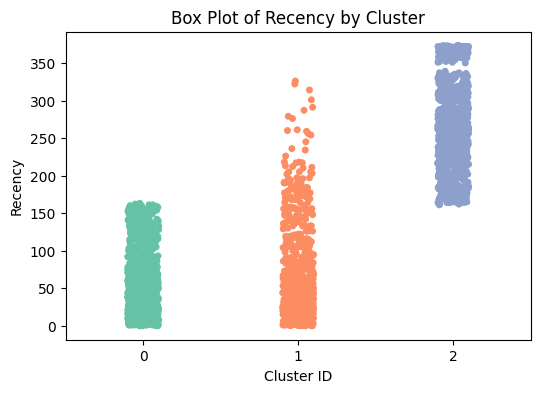

In [249]:
#Recency

## Box plot to visualize cluster - Recency
# Create a box plot to visualize the distribution of 'TotalAmount' by 'cluster id'
plt.figure(figsize=(6, 4))
sns.stripplot(x='cluster id', y='Recency', data=rfm, palette="Set2")

# Add title and labels
plt.title('Box Plot of Recency by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Recency')

# Display the plot
plt.show()
